In [6]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.resetwarnings()
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', RuntimeWarning)
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
X_trainn = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/homework4/X_train.csv', header=None)
y_trainn = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/homework4/y_train.csv', header=None)
X_testt  = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/homework4/X_test.csv', header=None)
y_testt  = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/homework4/y_test.csv', header=None)
X_train = np.array(X_trainn)
y_train = np.array(y_trainn).reshape((-1))
X_test = np.array(X_testt)
y_test = np.array(y_testt).reshape((-1))
print("X_train.shape=",X_train.shape)
print("X_test.shape=",X_test.shape)
print("y_train.shape=",y_train.shape)
print("y_test.shape=",y_test.shape)

X_train.shape= (10000, 784)
X_test.shape= (5000, 784)
y_train.shape= (10000,)
y_test.shape= (5000,)


In [15]:
scaler=RobustScaler()
scaler.fit(X_train)
X_train_s = scaler.transform (X_train)
X_test_s = scaler.transform (X_test)

In [ ]:
## No preprocessing
## Default MLP 
val_accs_mlp  = []
train_accs_mlp= []
mlp = MLPClassifier(solver='adam', random_state=0).fit(X_train, y_train)
cv_results = cross_validate(mlp, X_train, y_train, cv=4, return_train_score=True)
train_accs_mlp.append(np.round(100*np.mean(cv_results["train_score"]),2))
val_accs_mlp.append(np.round(100*np.mean(cv_results["test_score"]),2))
print("val_accs_mlp =",val_accs_mlp )
print("train_accs_mlp=",train_accs_mlp)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: ignored

In [13]:
## optimization
# Number of hidden layers
val_accs_mlp_h  = []
train_accs_mlp_h= []
h=[1,2,3,5,10,15,20,30,50,100,200]
for hi in h: 
  mlp_h = MLPClassifier(hidden_layer_sizes=hi, max_iter=1000,random_state=0).fit(X_train_s, y_train)
  cv_results_mlp_h = cross_validate(mlp_h, X_train_s, y_train, cv=4, return_train_score=True)
  train_accs_mlp_h.append(np.round(100*np.mean(cv_results_mlp_h["train_score"]),2))
  val_accs_mlp_h.append(np.round(100*np.mean(cv_results_mlp_h["test_score"]),2))
print("Accuracy on training set:",train_accs_mlp_h)
print("Accuracy on validation set:",val_accs_mlp_h )

Accuracy on training set: [68.44, 86.95, 93.82, 98.43, 99.81, 99.9, 99.63, 99.99, 100.0, 100.0, 100.0]
Accuracy on validation set: [64.48, 78.54, 83.97, 84.19, 86.5, 87.48, 87.9, 88.93, 89.27, 89.74, 89.87]


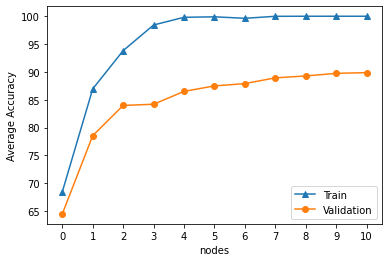

In [14]:
j=np.arange(len(h))
plt.plot(j,train_accs_mlp_h, marker="^",label="Train")
plt.plot(j,val_accs_mlp_h, marker="o", label="Validation")
_ = plt.xticks(j)
plt.xlabel("nodes")
plt.ylabel("Average Accuracy")
# plt.ylim(bottom=75, top=100)
plt.legend()

In [16]:
val_accs_mlp_l  = []
train_accs_mlp_l= []
# l=[[30,30],[30,30,30],[30,30,30,30],[30,30,30,30,30],[30,30,30,30,30,30],[30,30,30,30,30,30,30],[30,30,30,30,30,30,30,30],[30,30,30,30,30,30,30,30,30],[30,30,30,30,30,30,30,30,30,30]]
l=[[5,5],[5,5,5],[5,5,5,5],[5,5,5,5,5]]

for li in l: 
  mlp_l = MLPClassifier(hidden_layer_sizes=li,random_state=0).fit(X_train_s, y_train)
  cv_results_mlp_l = cross_validate(mlp_l, X_train_s, y_train, cv=4, return_train_score=True)
  train_accs_mlp_l.append(np.round(100*np.mean(cv_results_mlp_l["train_score"]),2))
  val_accs_mlp_l.append(np.round(100*np.mean(cv_results_mlp_l["test_score"]),2))
print("Accuracy on training set:",train_accs_mlp_l)
print("Accuracy on validation set:",val_accs_mlp_l )

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

Accuracy on training set: [85.74, 86.35, 89.16, 90.65]
Accuracy on validation set: [79.33, 79.78, 82.67, 83.8]


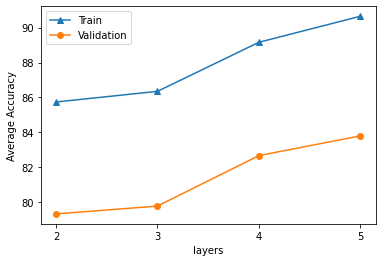

In [17]:
i=np.arange(len(l))+2
# i=np.arange(len(val_accs_mlp_l))
plt.plot(i,train_accs_mlp_l, marker="^",label="Train")
plt.plot(i,val_accs_mlp_l, marker="o", label="Validation")
_ = plt.xticks(i)
plt.xlabel("layers")
plt.ylabel("Average Accuracy")
# plt.ylim(bottom=75, top=100)
plt.legend()

train_accs_mlp_hn= [20.0, 20.0, 20.0, 20.0, 46.35, 81.16, 80.11, 89.86, 92.68, 95.89]
train_accs_mlp_hn= [20.0, 20.0, 20.02, 20.01, 80.61, 76.01, 88.83, 92.73, 93.17, 95.17]
train_accs_mlp_hn= [20.0, 20.0, 20.0, 72.81, 77.17, 86.38, 92.26, 93.73, 93.81, 95.14]
train_accs_mlp_hn= [20.0, 20.0, 20.0, 77.94, 86.75, 92.36, 91.49, 93.69, 93.26, 95.34]
train_accs_mlp_hn= [20.0, 20.0, 20.0, 85.47, 89.22, 85.02, 93.04, 95.82, 95.99, 96.33]


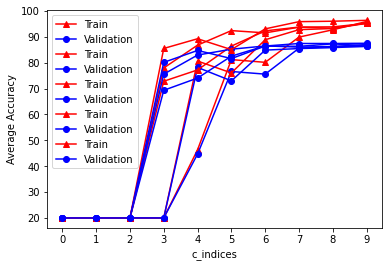

In [27]:
layers=[1,2,3,4,5,6]
h=[1,2,3,5,10,15,20,30,50,100]
# h=[1,2,3,5,10,15,20]
# h=[1,2,3]
# train_accs_mlp_la = dict()
# val_accs_mlp_la = dict()

for  j in range(5):
  l=[]
  list_new=[]
  for index,k in enumerate(h):
    list_new.append([k]*(j+1))
      # print("l=",l)
  l.append(list_new)
  # print(l)
      # print("l=",l)
        #l=l+[hi]*(index+1)
# print("l=",l)
  val_accs_mlp_hn  = []
  train_accs_mlp_hn= []
  for li in l[0]:

    #print(li)
    mlp_hn = MLPClassifier(hidden_layer_sizes=li,max_iter=500,random_state=0).fit(X_train, y_train)
    cv_results_hn = cross_validate(mlp_hn, X_train, y_train, cv=4, return_train_score=True)
    train_accs_mlp_hn.append(np.round(100*np.mean(cv_results_hn["train_score"]),2))
    val_accs_mlp_hn.append(np.round(100*np.mean(cv_results_hn["test_score"]),2))
  i=np.arange(len(h))
  print("train_accs_mlp_hn=",train_accs_mlp_hn)
  plt.plot(i,train_accs_mlp_hn, marker="^",label="Train",color='red')
  plt.plot(i,val_accs_mlp_hn, marker="o", label="Validation",color='blue')
  _ = plt.xticks(i)
  plt.xlabel("c_indices")
  plt.ylabel("Average Accuracy")
  # plt.ylim(bottom=75, top=100)
  plt.legend()
plt.show()
  


In [ ]:
act_func=['identity' , 'logistic', 'tanh', 'relu']
# h=[1,2,3,5,10,15,20,30,50,100,200,500]
h=[1,2,3,5,10,15,20,30,50,100]
train_accs_mlp_a = dict()
val_accs_mlp_a = dict()

for ai in act_func:
    val_accs_mlp_a[ai]  = []
    train_accs_mlp_a[ai]= []
    for hi in h:
        mlp_a = MLPClassifier(hidden_layer_sizes=hi,activation=ai, max_iter=500,random_state=0).fit(X_train, y_train)
        cv_results_a = cross_validate(mlp_a, X_train, y_train, cv=4, return_train_score=True)
        train_accs_mlp_a[ai].append(np.round(100*np.mean(cv_results_a["train_score"]),2))
        val_accs_mlp_a[ai].append(np.round(100*np.mean(cv_results_a["test_score"]),2))


In [1]:
for ai in act_func:
    plt.plot(h,val_accs_mlp_h[ai], marker="o", label="max_depth={}".format(d))
_ = plt.xticks(h)
plt.xlabel("# nodes")
plt.ylabel("Validation Accuracy")
plt.legend()

NameError: ignored

[1]
[1, 1]


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1, 1]
[2]


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[2, 2]
